In [137]:
import numpy as np
import os 
import arviz as az
import pandas as pd
import math
from scipy import stats
from scipy.stats import norm
import xarray as xr
import copy
import matplotlib.pyplot as plt
import math

path = "/Users/laurenkerker/Documents/RGT/sparklyRGT"
os.chdir(path)
os.chdir("sparklyRGT_tutorial") 
import sparklyRGT as rgt
path = os.getcwd()
os.chdir("../Pystan") 
from model_data import *
pd.set_option('display.max_rows',100)

/Users/laurenkerker/Documents/RGT/sparklyRGT/sparklyRGT_tutorial


In [138]:
#this function is for transforming the plots into the right parameter space
#(for parameters that got phi_approx in the model code)
def transform1(dataset):
    variable = norm.pdf(dataset.mu_pr.values)
    dataset.mu_pr.values = variable
    return dataset

def transform_beta(dataset):
    variable = norm.pdf(dataset.mu_pr.values)*100
    dataset.mu_pr.values = variable
    return dataset


In [139]:
os.getcwd()

'/Users/laurenkerker/Documents/RGT/sparklyRGT/Pystan'

In [140]:
os.chdir('nc_files')

In [141]:
loss_basic_fit = az.from_netcdf('loss_basic_fit.nc')
outcome_basic_fit = az.from_netcdf('outcome_basic_fit.nc')
random_basic_fit = az.from_netcdf('random_basic_fit.nc')
reverse_basic_fit = az.from_netcdf('reverse_basic_fit.nc')
standard_basic_fit = az.from_netcdf('standard_basic_fit.nc')
uncued_basic_fit = az.from_netcdf('uncued_basic_fit.nc')

loss_basicstar_fit = az.from_netcdf('loss_basic-star_fit.nc')
outcome_basicstar_fit = az.from_netcdf('outcome_basic-star_fit.nc')
random_basicstar_fit = az.from_netcdf('random_basic-star_fit.nc')
reverse_basicstar_fit = az.from_netcdf('reverse_basic-star_fit.nc')
standard_basicstar_fit = az.from_netcdf('standard_basic-star_fit.nc')
uncued_basicstar_fit = az.from_netcdf('uncued_basic-star_fit.nc')

loss_pscale_fit = az.from_netcdf('loss_pscale_fit.nc')
outcome_pscale_fit = az.from_netcdf('outcome_pscale_fit.nc')
random_pscale_fit = az.from_netcdf('random_pscale_fit.nc')
reverse_pscale_fit = az.from_netcdf('reverse_pscale_fit.nc')
standard_pscale_fit = az.from_netcdf('standard_pscale_fit.nc')
uncued_pscale_fit = az.from_netcdf('uncued_pscale_fit.nc')

loss_pscalestar_fit = az.from_netcdf('loss_pscale-star_fit.nc')
outcome_pscalestar_fit = az.from_netcdf('outcome_pscale-star_fit.nc')
random_pscalestar_fit = az.from_netcdf('random_pscale-star_fit.nc')
reverse_pscalestar_fit = az.from_netcdf('reverse_pscale-star_fit.nc')
standard_pscalestar_fit = az.from_netcdf('standard_pscale-star_fit.nc')
uncued_pscalestar_fit = az.from_netcdf('uncued_pscale-star_fit.nc')

loss_pindep_fit = az.from_netcdf('loss_pindep_fit.nc')
outcome_pindep_fit = az.from_netcdf('outcome_pindep_fit.nc')
random_pindep_fit = az.from_netcdf('random_pindep_fit.nc')
reverse_pindep_fit = az.from_netcdf('reverse_pindep_fit.nc')
standard_pindep_fit = az.from_netcdf('standard_pindep_fit.nc')
uncued_pindep_fit = az.from_netcdf('uncued_pindep_fit.nc')

loss_pindepstar_fit = az.from_netcdf('loss_pindep-star_fit.nc')
outcome_pindepstar_fit = az.from_netcdf('outcome_pindep-star_fit.nc')
random_pindepstar_fit = az.from_netcdf('random_pindep-star_fit.nc')
reverse_pindepstar_fit = az.from_netcdf('reverse_pindep-star_fit.nc')
standard_pindepstar_fit = az.from_netcdf('standard_pindep-star_fit.nc')
uncued_pindepstar_fit = az.from_netcdf('uncued_pindep-star_fit.nc')
os.chdir('..//cmdstan_output')
random8sess_pindep_fit = az.from_netcdf('Random_pindep_fit_8sess.nc')
random2000_pindep_fit = az.from_netcdf('Random_pindep_fit_2000_ad99.nc')
uncued2000_pindep_fit = az.from_netcdf('Classic_pindep_fit_2000_ad99.nc')

##my code for setting parameter names below assumes you'll call the independent models 'pindep' and 'pindepstar'

In [42]:
#summary statistics for the model fit, including mean values of the posterior distribution 
pd.set_option('display.max_rows',350)
az.summary(random2000_pindep_fit).head(10)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_pr[0],-1.940,0.039,-2.010,-1.863,0.001,0.001,1418.0,2634.0,1.0
mu_pr[1],-2.003,0.050,-2.098,-1.907,0.002,0.001,979.0,1812.0,1.0
mu_pr[2],-2.723,0.148,-2.987,-2.482,0.007,0.005,597.0,555.0,1.0
mu_pr[3],-1.095,0.738,-2.486,0.291,0.014,0.010,2719.0,3733.0,1.0
mu_pr[4],0.911,0.438,0.193,1.824,0.016,0.011,706.0,616.0,1.0
mu_pr[5],0.436,0.208,0.101,0.856,0.008,0.006,627.0,603.0,1.0
mu_pr[6],0.721,0.321,0.196,1.369,0.012,0.009,620.0,567.0,1.0
sigma[0],0.172,0.032,0.116,0.233,0.001,0.001,1578.0,3722.0,1.0
sigma[1],0.237,0.041,0.163,0.313,0.001,0.001,1522.0,3451.0,1.0
sigma[2],0.251,0.077,0.144,0.372,0.004,0.003,904.0,700.0,1.0


In [79]:
az.summary(outcome_pindep_fit).head(10)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_pr[0],-2.113,0.042,-2.189,-2.031,0.001,0.001,1628.0,2154.0,1.0
mu_pr[1],-1.899,0.063,-2.020,-1.785,0.001,0.001,1851.0,2506.0,1.0
mu_pr[2],-1.870,0.175,-2.185,-1.540,0.006,0.004,808.0,1052.0,1.0
mu_pr[3],-0.707,0.266,-1.210,-0.216,0.007,0.005,1397.0,2149.0,1.0
mu_pr[4],-0.058,0.052,-0.148,0.051,0.001,0.001,2033.0,1723.0,1.0
mu_pr[5],0.024,0.022,-0.013,0.066,0.001,0.001,1004.0,1362.0,1.0
mu_pr[6],0.048,0.022,0.013,0.088,0.001,0.001,945.0,1334.0,1.0
sigma[0],0.148,0.034,0.089,0.215,0.001,0.001,1668.0,2404.0,1.0
sigma[1],0.243,0.056,0.148,0.347,0.001,0.001,1544.0,2281.0,1.0
sigma[2],0.468,0.132,0.243,0.701,0.004,0.003,908.0,1494.0,1.0


In [142]:
#second goal: get the sigmas as well 
#az.summary(outcome_pindep_fit)['mean'][7]

get_mean_params(outcome_pindep_fit, "pindep")

FileNotFoundError: [Errno 2] No such file or directory: 'model_data.nc'

In [ ]:
#to get the sigma values: 
az.summary(uncued_pindep_fit)['mean'][7]

In [ ]:
uncued_pindep_fit

In [ ]:
standard_pindep_fit.posterior.etaNegative[0]

In [ ]:
loss_pindep_fit.posterior.etaNegative[0]

In [ ]:
az.summary(random8sess_pindep_fit).head(10)

In [ ]:
az.plot_pair(random8sess_pindep_fit, divergences = True, var_names = ['mu_pr'])

In [ ]:
#print all the values for each parameter for each draw for each chain (1000 per 4 chains)
uncued_pindep_fit.posterior.mu_pr.values

In [43]:
#plot the posterior distributions for group parameters, for diff groups 

#parameters that don't need the transform --> m, b, the p weights

#beta needs beta_transform

#eta, etapos, etaneg needs transform1 


def graph(dataset, model, transform):
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']

    model_names = []
    for i in range(len(dataset)):
        model_names.append(locals()[dataset[i] + '_' + model + '_fit'])
    if transform == "transform1":
        ax = az.plot_density(model_names, 
                        var_names = 'mu_pr',
                        data_labels = dataset,
                        shade = 0.2, 
                        hdi_prob = 0.95,
                        transform = transform1,
                        colors = [colors[0],colors[1],colors[4]])
    if transform == "beta_transform":
        ax = az.plot_density(model_names, 
                        var_names = 'mu_pr',
                        data_labels = dataset,
                        shade = 0.2, 
                        hdi_prob = 0.95,
                        transform = beta_transform,
                        colors = [colors[0],colors[1],colors[4]])
    else:
        ax = az.plot_density(model_names, 
                var_names = 'mu_pr',
                data_labels = dataset,
                shade = 0.2, 
                hdi_prob = 0.95,
                colors = [colors[0],colors[1],colors[4]])
        

    #for setting the titles of the figure:
    if model == 'pindep':
        params = ['Beta', 'Eta Positive', 'Eta Negative', 'P1 weight', 'P2 weight', 'P3 weight', 'P4 weight']
    elif model == 'pindepstar':
        params = ['Beta', 'Eta', 'P1 weight', 'P2 weight', 'P3 weight', 'P4 weight']
    elif 'star' in model:
        #this list will work for both basicstar and pscalestar
        params = ['Beta', 'Eta', 'm', 'b']
    else:
        #this list will work for both basic and pscale
        params = ['Beta', 'Eta positive', 'Eta negative', 'm', 'b']

    row = list(range(0,math.ceil(len(params)/3))) 
    pos = list(range(0,3))
    title_num = 0

    #crummy code but it works lol
    for i in row:
        for j in pos:
            ax[i][j].set_title(params[title_num], fontsize = 'xx-large')
            title_num +=1

graph(['random2000','standard'],'pindep', "transform1")

KeyError: 'random2000_pindep_fit'

IndexError: list index out of range

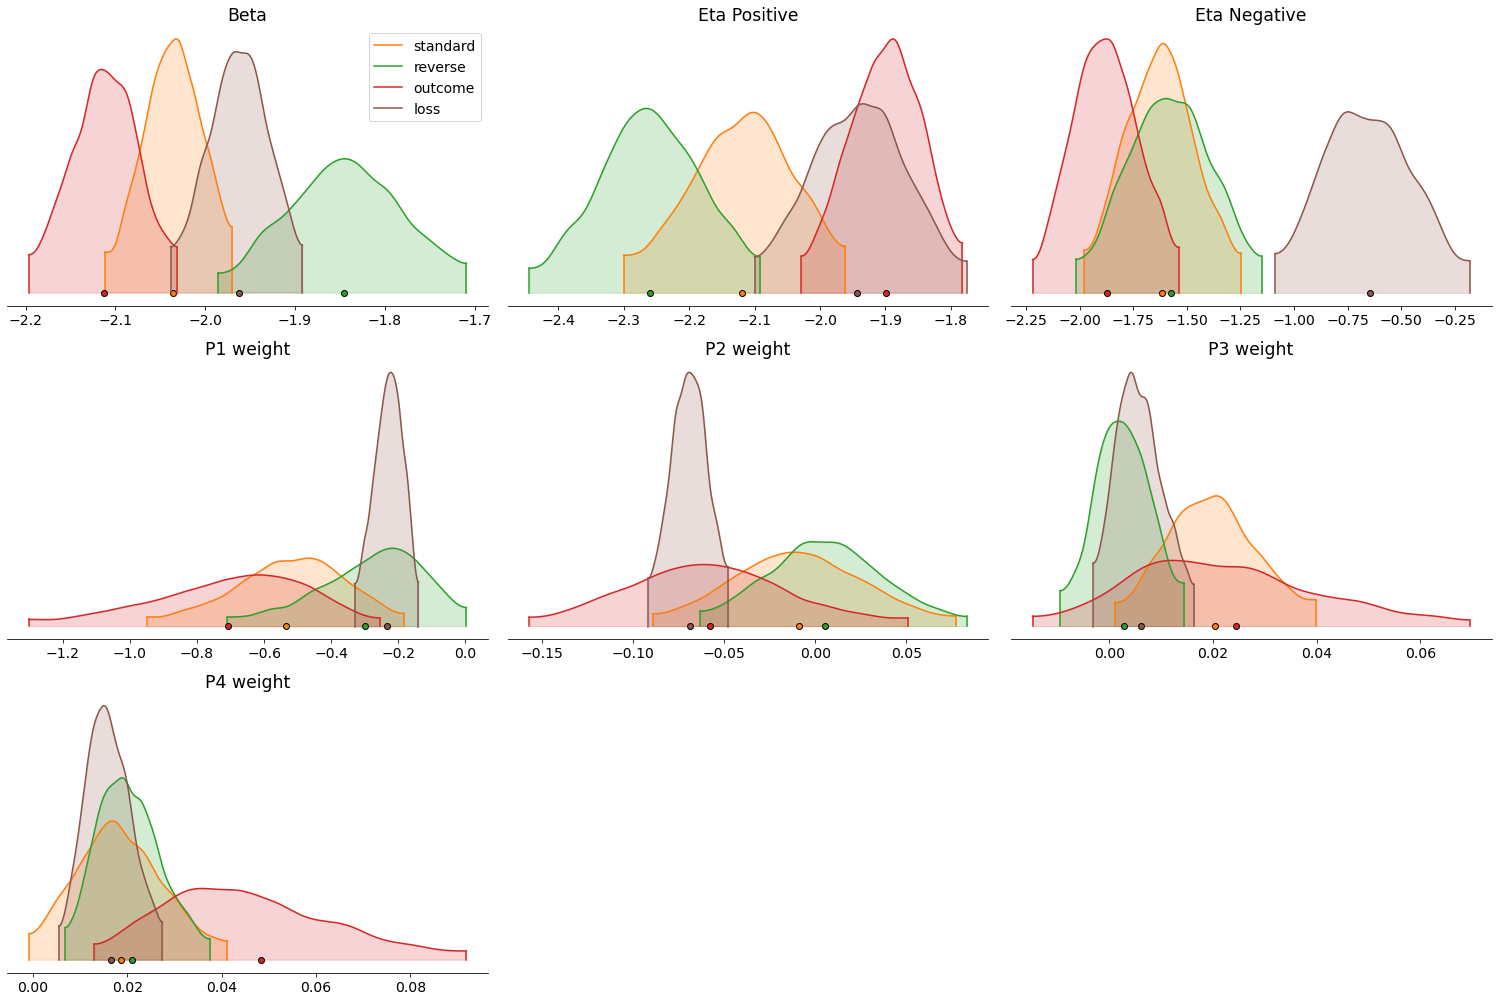

In [86]:
dataset = ['standard', 'reverse', 'outcome','loss']
model = 'pindep'


prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


model_names = []
for i in range(len(dataset)):
    model_names.append(locals()[dataset[i] + '_' + model + '_fit'])

ax = az.plot_density(model_names, 
                var_names = 'mu_pr', 
                data_labels = dataset,
                shade = 0.2, 
                hdi_prob = 0.95,
                colors = [colors[1],colors[2],colors[3],colors[5]])

#for setting the titles of the figure:
if model == 'pindep':
    params = ['Beta', 'Eta Positive', 'Eta Negative', 'P1 weight', 'P2 weight', 'P3 weight', 'P4 weight']
elif model == 'pindepstar':
    params = ['Beta', 'Eta', 'P1 weight', 'P2 weight', 'P3 weight', 'P4 weight']
elif 'star' in model:
    #this list will work for both basicstar and pscalestar
    params = ['Beta', 'Eta', 'm', 'b']
else:
    #this list will work for both basic and pscale
    params = ['Beta', 'Eta positive', 'Eta negative', 'm', 'b']

row = list(range(0,math.ceil(len(params)/3))) 
pos = list(range(0,3))
title_num = 0

#crummy code but it works lol
for i in row:
    for j in pos:
        ax[i][j].set_title(params[title_num], fontsize = 'xx-large')
        title_num +=1

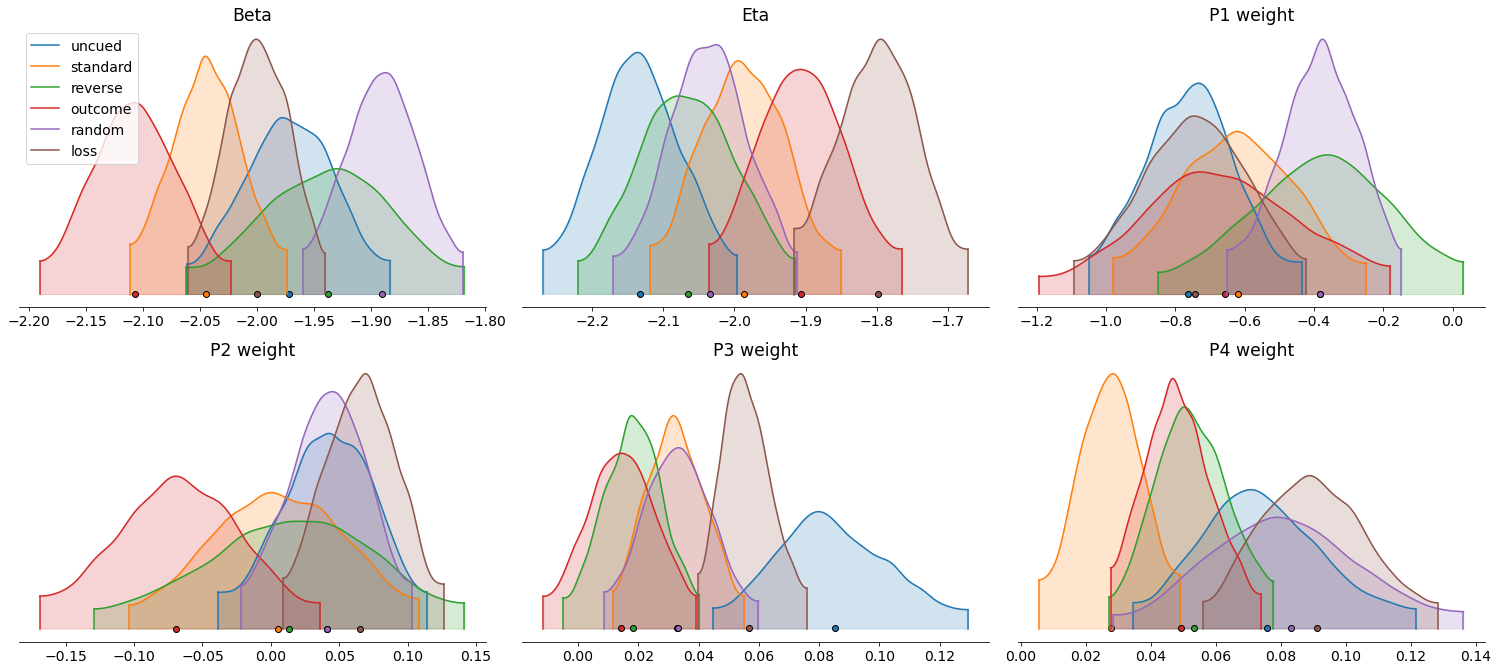

In [85]:

dataset = ['uncued','standard','random']
model = 'pindepstar'

model_names = []
for i in range(len(dataset)):
    model_names.append(copy.deepcopy(locals()[dataset[i] + '_' + model + '_fit']))

ax = az.plot_density(model_names, 
                var_names = 'mu_pr', 
                data_labels = dataset,
                shade = 0.2, 
                hdi_prob = 0.95)

#for setting the titles of the figure:
if model == 'pindep':
    params = ['Beta', 'Eta Positive', 'Eta Negative', 'P1 weight', 'P2 weight', 'P3 weight', 'P4 weight']
elif model == 'pindepstar':
    params = ['Beta', 'Eta', 'P1 weight', 'P2 weight', 'P3 weight', 'P4 weight']
elif 'star' in model:
    #this list will work for both basicstar and pscalestar
    params = ['Beta', 'Eta', 'm', 'b']
else:
    #this list will work for both basic and pscale
    params = ['Beta', 'Eta positive', 'Eta negative', 'm', 'b']

row = list(range(0,math.ceil(len(params)/3))) 
pos = list(range(0,3))
title_num = 0

for i in row:
    for j in pos:
#         ax[i][j].spines['left'].set_linewidth(2)
        ax[i][j].set_title(params[title_num], fontsize = 'xx-large')
        title_num +=1
        

In [120]:
sample_diff(6, random_pindep_fit, loss_pindep_fit)

AttributeError: module 'model_data' has no attribute 'sample_diff'

In [95]:
loss_basic_fit = az.from_netcdf('loss_basic_fit.nc')
outcome_basic_fit = az.from_netcdf('outcome_basic_fit.nc')
random_basic_fit = az.from_netcdf('random_basic_fit.nc')
reverse_basic_fit = az.from_netcdf('reverse_basic_fit.nc')
standard_basic_fit = az.from_netcdf('standard_basic_fit.nc')
uncued_basic_fit = az.from_netcdf('uncued_basic_fit.nc')

loss_basicstar_fit = az.from_netcdf('loss_basic-star_fit.nc')
outcome_basicstar_fit = az.from_netcdf('outcome_basic-star_fit.nc')
random_basicstar_fit = az.from_netcdf('random_basic-star_fit.nc')
reverse_basicstar_fit = az.from_netcdf('reverse_basic-star_fit.nc')
standard_basicstar_fit = az.from_netcdf('standard_basic-star_fit.nc')
uncued_basicstar_fit = az.from_netcdf('uncued_basic-star_fit.nc')

loss_pscale_fit = az.from_netcdf('loss_pscale_fit.nc')
outcome_pscale_fit = az.from_netcdf('outcome_pscale_fit.nc')
random_pscale_fit = az.from_netcdf('random_pscale_fit.nc')
reverse_pscale_fit = az.from_netcdf('reverse_pscale_fit.nc')
standard_pscale_fit = az.from_netcdf('standard_pscale_fit.nc')
uncued_pscale_fit = az.from_netcdf('uncued_pscale_fit.nc')

loss_pscalestar_fit = az.from_netcdf('loss_pscale-star_fit.nc')
outcome_pscalestar_fit = az.from_netcdf('outcome_pscale-star_fit.nc')
random_pscalestar_fit = az.from_netcdf('random_pscale-star_fit.nc')
reverse_pscalestar_fit = az.from_netcdf('reverse_pscale-star_fit.nc')
standard_pscalestar_fit = az.from_netcdf('standard_pscale-star_fit.nc')
uncued_pscalestar_fit = az.from_netcdf('uncued_pscale-star_fit.nc')

loss_pindep_fit = az.from_netcdf('loss_pindep_fit.nc')
outcome_pindep_fit = az.from_netcdf('outcome_pindep_fit.nc')
random_pindep_fit = az.from_netcdf('random_pindep_fit.nc')
reverse_pindep_fit = az.from_netcdf('reverse_pindep_fit.nc')
standard_pindep_fit = az.from_netcdf('standard_pindep_fit.nc')
uncued_pindep_fit = az.from_netcdf('uncued_pindep_fit.nc')

loss_pindepstar_fit = az.from_netcdf('loss_pindep-star_fit.nc')
outcome_pindepstar_fit = az.from_netcdf('outcome_pindep-star_fit.nc')
random_pindepstar_fit = az.from_netcdf('random_pindep-star_fit.nc')
reverse_pindepstar_fit = az.from_netcdf('reverse_pindep-star_fit.nc')
standard_pindepstar_fit = az.from_netcdf('standard_pindep-star_fit.nc')
uncued_pindepstar_fit = az.from_netcdf('uncued_pindep-star_fit.nc')
